# Simple `Binomial` Example

Just copying over a quick example [from StackExchange](http://stats.stackexchange.com/questions/261504/fitting-simple-binomial-model-in-pymc-slow-convergence).

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as tt
from scipy import stats as st

from utils import plt, sns

In [2]:
x = st.binom.rvs(n=1000, p=0.37, size=50)
print pd.Series(x).head()

0    385
1    369
2    357
3    365
4    359
dtype: int64


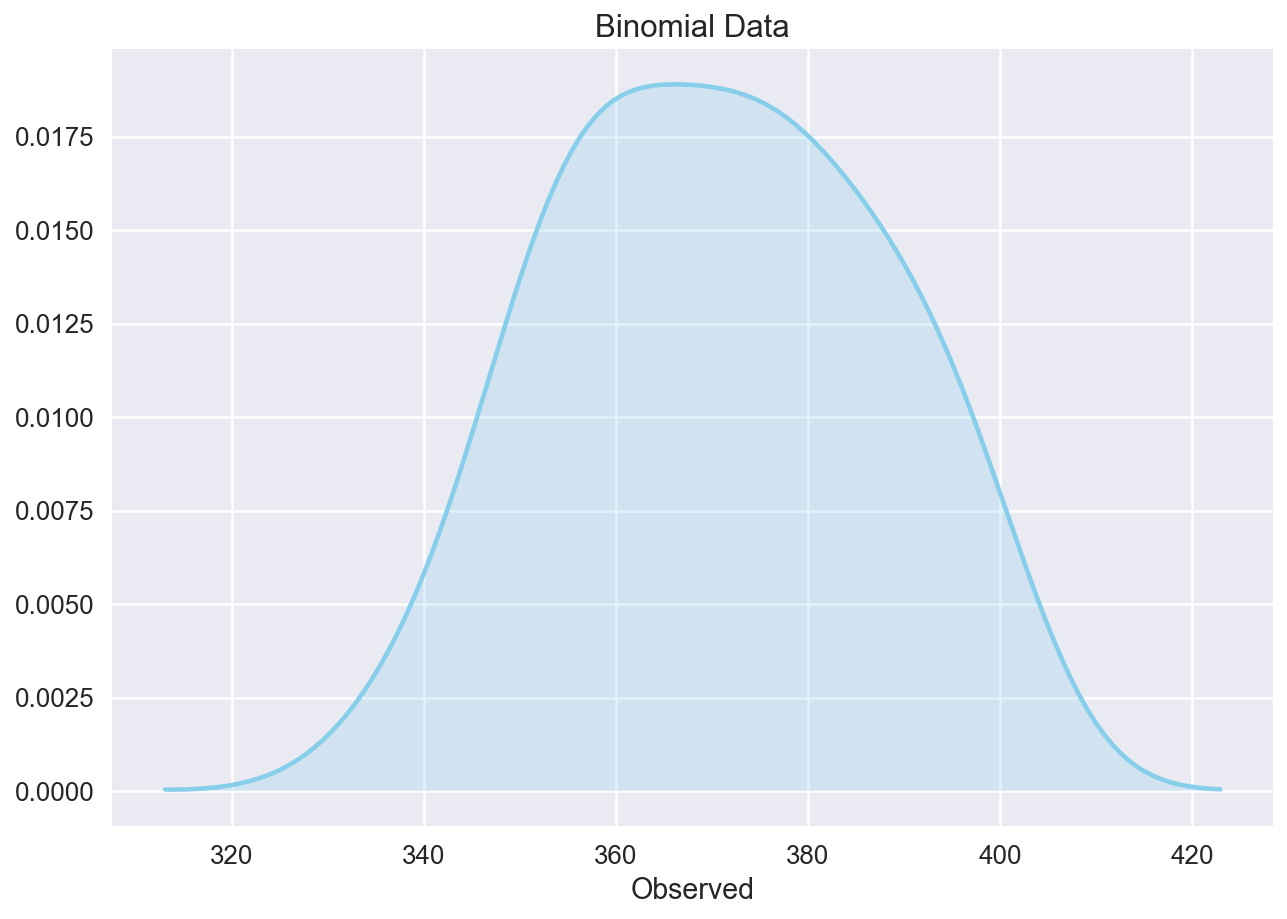

In [3]:
sns.kdeplot(x, shade=True)
plt.title("Binomial Data")
plt.xlabel("Observed")

In [4]:
with pm.Model() as model:
    # Priors
    p = pm.Beta("p", alpha=2, beta=2)

    # Likelihood
    y = pm.Binomial("y", p=p, n=1000, observed=x)

    # Sample
    trace = pm.sample(draws=6000, tune=2000)
    
burn_in = 2000
trace = trace[burn_in:]

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -215.62: 100%|██████████| 200000/200000 [00:12<00:00, 16584.29it/s]
Finished [100%]: Average ELBO = -215.64
100%|██████████| 6000/6000 [00:02<00:00, 2923.83it/s]



p:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.371            0.002            0.000            [0.367, 0.375]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.366          0.369          0.371          0.372          0.375

None


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110e46b50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x110ec0650>]], dtype=object)

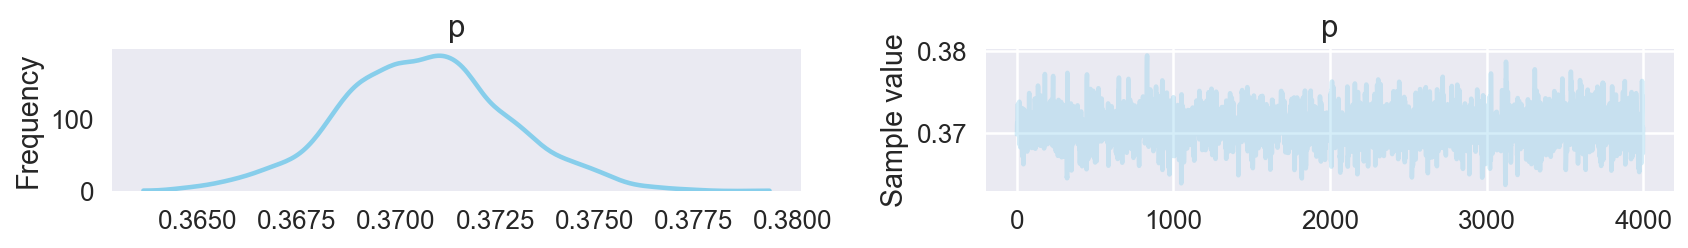

In [5]:
print(pm.summary(trace))
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x110eea810>], dtype=object)

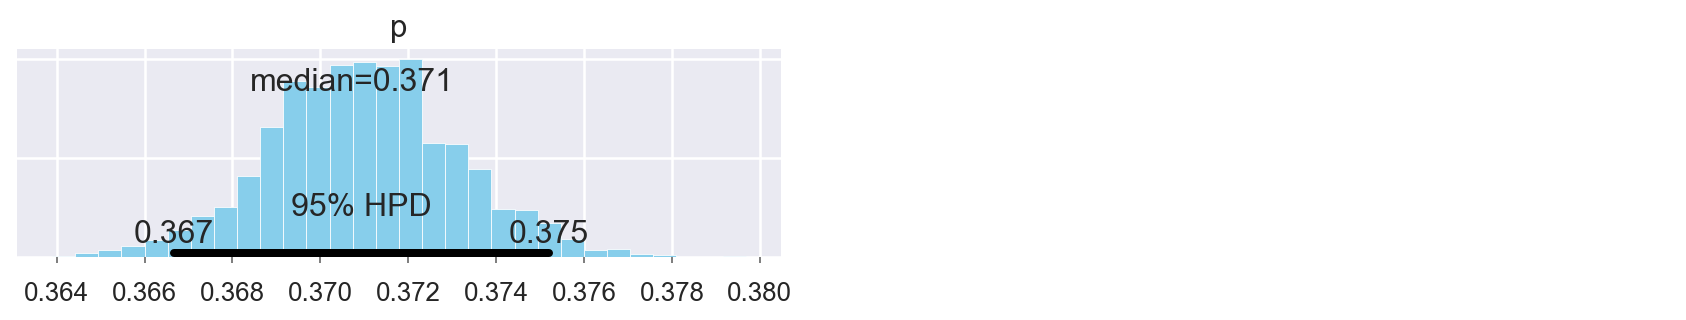

In [6]:
pm.plot_posterior(trace, point_estimate="median")